In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import  pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
# Adım 1: Genel resmi inceleyiniz.
def veri(data):
    print('########### head ########')
    print(data.head())
    print('########### shape #################')
    print(data.shape)
    print('########## isnull.sum ########')
    print(data.isnull().sum())
    print('########## describe #########')
    print(data.describe().T)
    print('############ info #############')
    print(data.info())
    print('############## dtype ############')
    print(data.dtypes)
    print('########### tail ###########')
    print(data.tail())
    print('############# columns ##########')
    print(data.columns)

veri(df)

########### head ########
   PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI   
0            6      148             72             35        0  33.6  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DIABETESPEDIGREEFUNCTION  AGE  OUTCOME  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
########### shape #################
(768, 9)
########## isnull.sum ########
PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCT

In [71]:
# Adım 2: Numerik ve kategorik değişkenleri yakalayınız.
def grab_col(data,cat_th=5,car_th=20):
    # categorik
    cat_cols=[col for col in data.columns if data[col].dtypes =='O' ]
    num_but_cat=[col for col in data.columns if data[col].nunique() < cat_th and data[col].dtypes !='O' ]
    cat_but_car =[col for col in data.columns if data[col].nunique() > car_th and data[col].dtypes =='O']
    cat_cols=cat_cols + num_but_cat
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
     # Numerik 
    num_cols=[col for col in data.columns if data[col].dtypes !='O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
    
    print(f'Gozlem Sayisi: {data.shape[0]}')
    print(f'Deyisken Sayisi: {data.shape[1]}')
    print(f'Kategorik Deyisken: {len(cat_cols)}')
    print(f'Sayısal Görünümlü Kategorik Değişkenler: {len(num_but_cat)}')
    print(f'Kardinalitesi Yüksek Değişkenler: {len(cat_but_car)}')
    print(f'Sayısal Değişkenler: {len(num_cols)}')
    
    return cat_cols, num_cols, cat_but_car


In [72]:
cat_cols, num_cols, cat_but_car=grab_col(df)

Gozlem Sayisi: 768
Deyisken Sayisi: 9
Kategorik Deyisken: 1
Sayısal Görünümlü Kategorik Değişkenler: 1
Kardinalitesi Yüksek Değişkenler: 0
Sayısal Değişkenler: 8


In [28]:
cat_cols

['OUTCOME']

In [29]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

In [35]:
# Adım 3.1: Numerik değişkenlerin analizini yapınız
def number(data, num_col):
    quantiles=[0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(data[num_col].describe(quantiles))

In [36]:
for col in num_cols:
    number(df,col)

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: PREGNANCIES, dtype: float64
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: GLUCOSE, dtype: float64
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000

In [76]:
# Adım 3.2: Kategorik değişkenlerin analizini yapınız.
def category(data, col_name):
    print(pd.DataFrame({col_name: data[col_name].value_counts(),
    'Ratio': 100 * data[col_name].value_counts() / len(data)}))

In [77]:
for col in cat_cols:
    category(df,col)

         OUTCOME      Ratio
OUTCOME                    
0            500  65.104167
1            268  34.895833


In [78]:
# Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)
def target_summary_with_num(dataframe, target, numerical_col):
    print(pd.DataFrame(dataframe.groupby(target).agg({numerical_col : ["mean", "std", "count"]})))
     

In [81]:
for col in num_cols:
    target_summary_with_num(df, "OUTCOME", col)


        PREGNANCIES                
               mean       std count
OUTCOME                            
0          3.298000  3.017185   500
1          4.865672  3.741239   268
            GLUCOSE                 
               mean        std count
OUTCOME                             
0        109.980000  26.141200   500
1        141.257463  31.939622   268
        BLOODPRESSURE                 
                 mean        std count
OUTCOME                               
0           68.184000  18.063075   500
1           70.824627  21.491812   268
        SKINTHICKNESS                 
                 mean        std count
OUTCOME                               
0           19.664000  14.889947   500
1           22.164179  17.679711   268
            INSULIN                  
               mean         std count
OUTCOME                              
0         68.792000   98.865289   500
1        100.335821  138.689125   268
               BMI                
              mean  

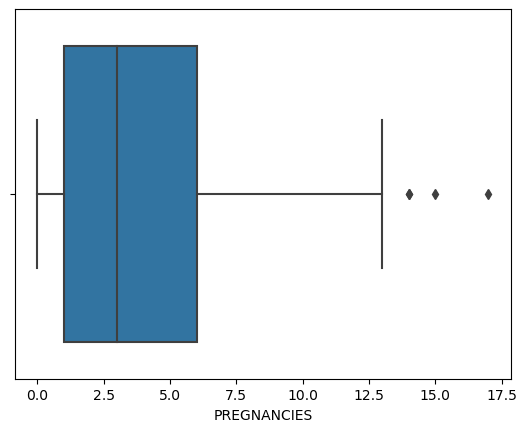

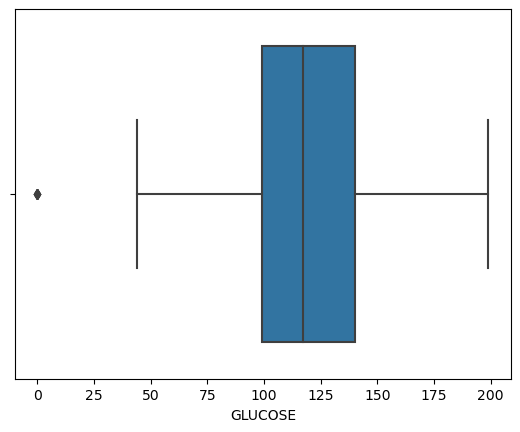

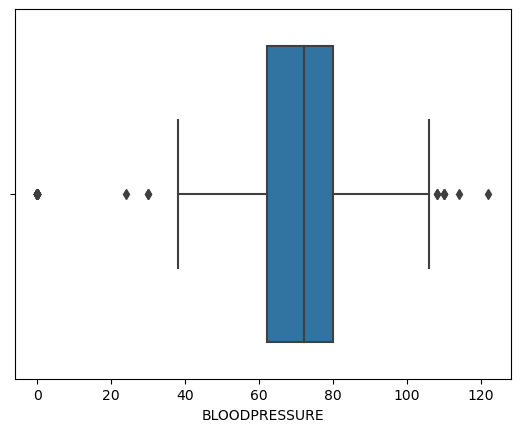

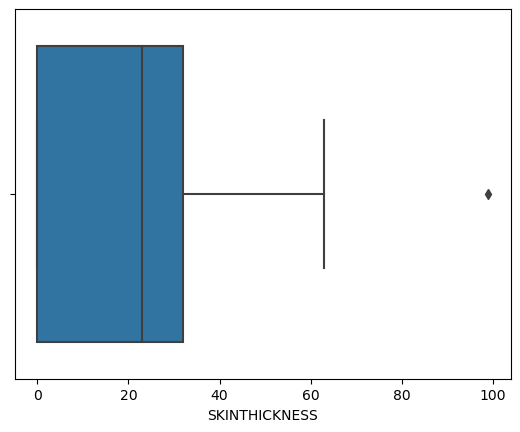

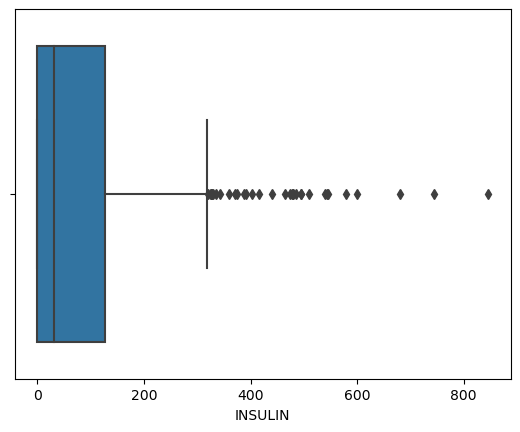

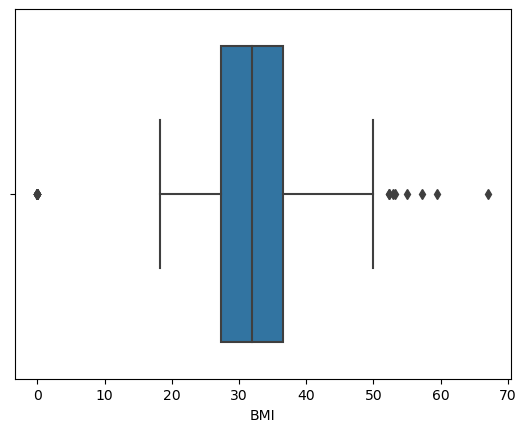

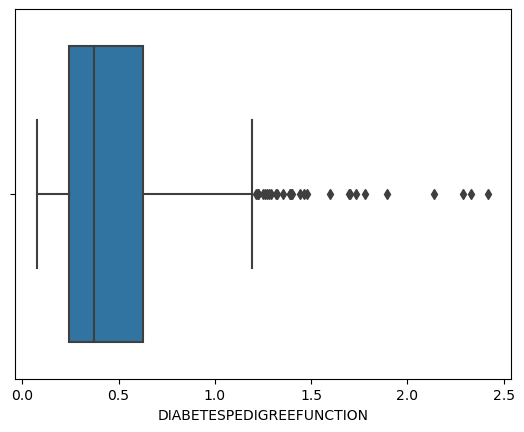

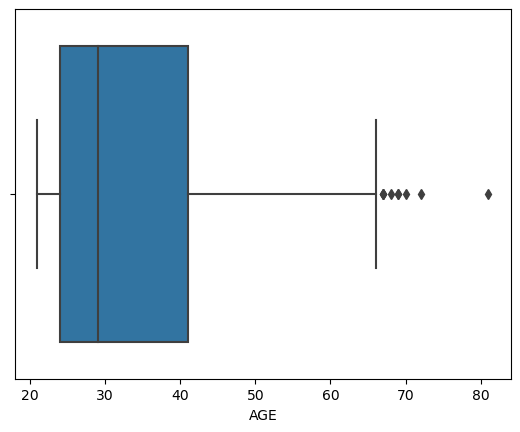

In [39]:
# Adım 5: Aykırı gözlem analizi yapınız.
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show(block=True)

In [40]:
# Adım 5: Aykırı gözlem analizi yapınız.
def out_liter(data,col_name, q1=0.25, q3=0.75):
    query1=data[col_name].quantile(q1)
    query3=data[col_name].quantile(q3)
    iqr=query3 - query1
    low_limit=query1 - 1.5 * iqr
    up_limit=query3 + 1.5 * iqr
    
    return low_limit, up_limit


In [44]:
for col in num_cols:
    print(col, out_liter(df, col))
    

PREGNANCIES (-6.5, 13.5)
GLUCOSE (37.125, 202.125)
BLOODPRESSURE (35.0, 107.0)
SKINTHICKNESS (-48.0, 80.0)
INSULIN (-190.875, 318.125)
BMI (13.35, 50.550000000000004)
DIABETESPEDIGREEFUNCTION (-0.32999999999999996, 1.2)
AGE (-1.5, 66.5)


In [47]:
def chech(data,col_name):
    low_limit,up_limit=out_liter(data,col_name)
    if data[(data[col_name] < low_limit) | (data[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [48]:
for col in num_cols:
    print(col, chech(df, col))

PREGNANCIES True
GLUCOSE True
BLOODPRESSURE True
SKINTHICKNESS True
INSULIN True
BMI True
DIABETESPEDIGREEFUNCTION True
AGE True


In [52]:
# Aykiri Deyerlere Erismek
def grab_out(data,col_name):
    low_limit, up_limit=out_liter(data, col_name)
    if data[((data[col_name] < low_limit) | (data[col_name] > up_limit))].shape[0] > 10:
        print(data[((data[col_name] < low_limit) | (data[col_name] > up_limit))].head())
    
    else:
        print(data[((data[col_name] < low_limit)| (data[col_name] > up_limit))])
    

In [53]:
for col in num_cols:
    print(col, grab_out(df,col))
    

     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI   
88            15      136             70             32      110  37.1  \
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DIABETESPEDIGREEFUNCTION  AGE  OUTCOME  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
PREGNANCIES None
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI   
75             1        0             48             20        0  24.7  \
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502         

In [86]:
# Adım 6: Eksik gözlem analizi yapınız.
def missing_values(data):
    na_columns=[col for col in data.columns if data[col].isnull().sum() > 0]
    na_sort=data[na_columns].isnull().sum().sort_values(ascending=False)
    ratio=(data[na_columns].isnull().sum() / data.shape[0] * 100)
    concat=pd.concat([na_sort, np.round(ratio, 2)], axis=1, keys=['eksik_veriler', 'ratio'])
    print(concat)
    

In [87]:
missing_values(df)

Empty DataFrame
Columns: [eksik_veriler, ratio]
Index: []
